##Connect to Google Drive

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
#move to images folder 
%cd /content/gdrive/MyDrive/dataset/

/content/gdrive/MyDrive/dataset


##Test Playground

import library

In [ ]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps, ImageEnhance
import colorsys
import random
import os

load image and set parameter

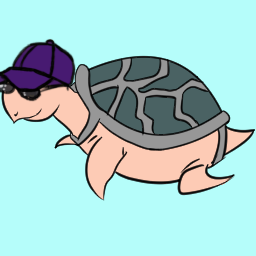

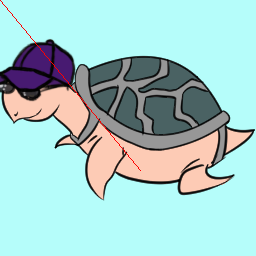

In [ ]:
im1 = Image.open('Turtle/turtle/3.png')
px1 = im1.load()
display(im1)

body_coor = (140, 170) #(x,y)
body_color = px1[body_coor][:3]

#test mark pixel by draw line from (0,0) 
im1_copy = im1.copy()
draw1 = ImageDraw.Draw(im1_copy)
draw1.line(body_coor + (0, 0), fill=(255, 0, 0))
display(im1_copy)

In [ ]:
print (body_color)

(181, 253, 250)


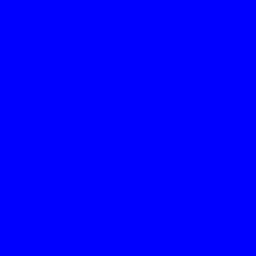

In [ ]:
#show body color
#im2 = Image.new("RGB", im1.size, body_color)
im2 = Image.new("RGB", im1.size, (0, 0, 255))
display(im2)

set parameter for mask position

In [ ]:
pos = [(140, 160)] #(x,y)

In [ ]:
def mask_jitter(pos, size, im, im_color):
  mask = Image.new("L", im.size, 0)
  jitter_pos = random.randint(3, 9)
  x = pos[0]
  y = pos[1]
  shape = [(x, y), (x+size, y+size)]

  draw = ImageDraw.Draw(mask)
  draw.ellipse(shape, fill=255)
  display(mask)
  result = Image.composite(im_color, im, mask)
  return result

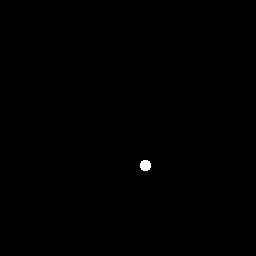

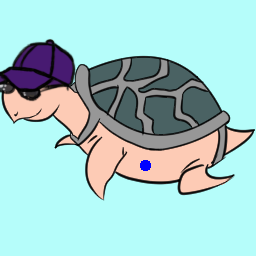

In [ ]:
im_test = im1.copy()
im_color_test = Image.new("RGB", im1.size, (255, 0, 0))
#im_test = mask_jitter(pos[0], 10, im_test, im_color_test)
im_test = mask_jitter(pos[0], 10, im_test, im2)
display(im_test)

##Test Playground

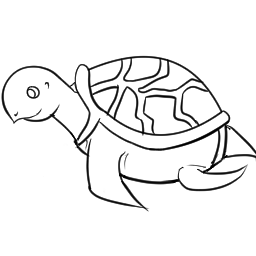

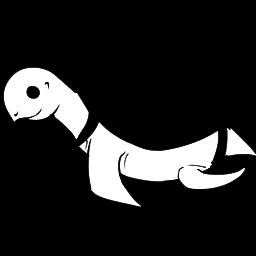

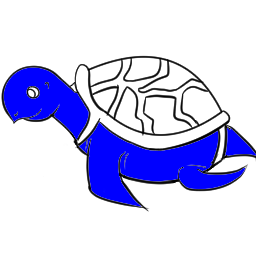

In [ ]:
im1 = Image.open('Animation/NewEdition/Turtle_raw_line/BASE/Turtle_frame_5.png')
mask = Image.open('Animation/NewEdition/Turtle_raw_line/MASK/Turtle_frame_5_mark.png').convert("L") #Cover_Mark, Turtle_frame_#_mark.png
color = Image.new("RGB", im1.size, (0, 0, 255))
result = Image.composite(color, im1, mask)
display(im1)
display(mask)
display(result)

In [ ]:
#texture
rootdir = 'Animation/NewEdition/Texture'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print(os.path.join(subdir, file))
        if int(file.replace('.jpg', '')) <= 50:
          print(file)

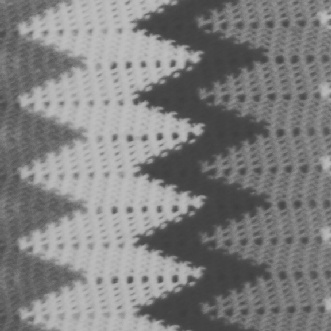

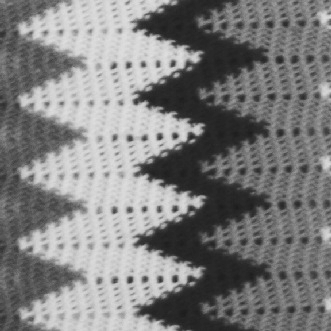

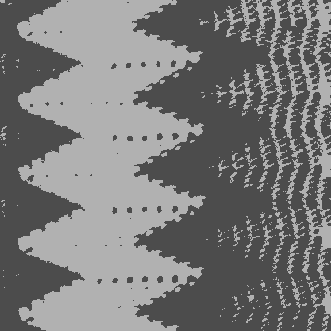

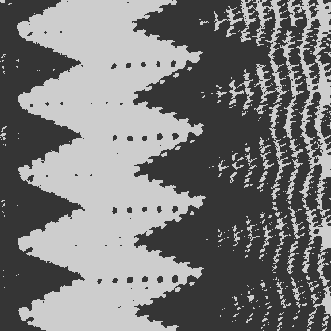

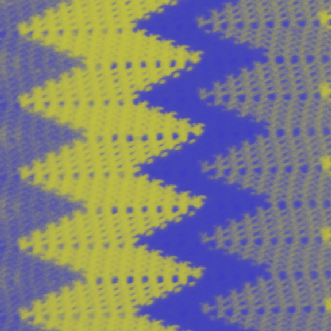

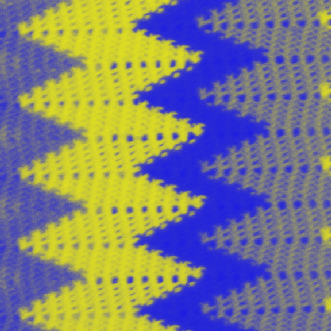

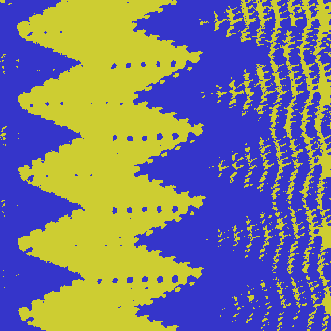

In [ ]:
texture = Image.open('Animation/NewEdition/Texture/mySelectTexture/Kyberge_blanket2/1.jpg').convert("L")
texture2 = texture.resize((256, 256))
enhancer  = ImageEnhance.Contrast(texture) #enhance contrast
factor = 1.5 #increase contrast
texture3 = enhancer.enhance(factor)
texture_color = ImageOps.colorize(texture, black ="blue", white ="yellow")
texture_color3 = ImageOps.colorize(texture3, black ="blue", white ="yellow")
texture_blur = texture.filter(ImageFilter.BLUR)
texture_color_reduced = texture3.convert('P', palette=Image.ADAPTIVE, colors=2)
texture_color_reduced = texture_color_reduced.convert("L")
enhancer2 = ImageEnhance.Contrast(texture_color_reduced) #enhance contrast
texture_color_reduced2 = enhancer2.enhance(factor)
texture_color4 = ImageOps.colorize(texture_color_reduced2, black ="blue", white ="yellow")
display(texture)
display(texture3)
display(texture_color_reduced)
display(texture_color_reduced2)
display(texture_color)
display(texture_color3)
display(texture_color4)

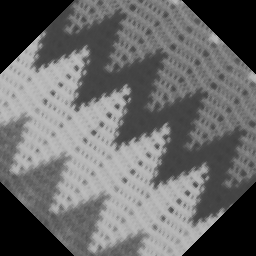

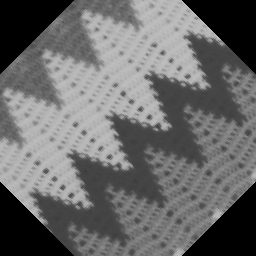

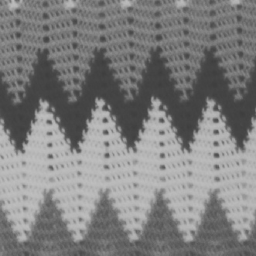

In [ ]:
rotate1 = texture2.rotate(45)
rotate2 = texture2.rotate(-45)
rotate3 = texture2.rotate(90)
display(rotate1)
display(rotate2)
display(rotate3)

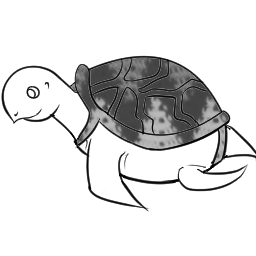

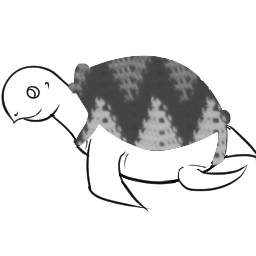

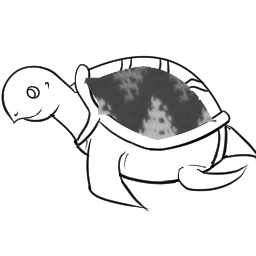

In [ ]:
im1 = Image.open('Animation/NewEdition/Turtle_raw_line/BASE/Turtle_frame_5.png')
mask = Image.open('Animation/NewEdition/Turtle_raw_line/MASK/Cover_Mark.png').convert("L") #Cover_Mark, Turtle_frame_#_mark.png
mask2 = mask.filter(ImageFilter.MaxFilter(5))
mask3 = mask2.filter(ImageFilter.MinFilter(21))
result = Image.composite(rotate3, im1, mask)
result2 = Image.composite(rotate3, im1, mask2)
result3 = Image.composite(rotate3, im1, mask3)
display(result)
display(result2)
display(result3)

In [ ]:
#mask shell erode 1-5
#mask body erode 1-15

In [ ]:
random.randint(3, 9)

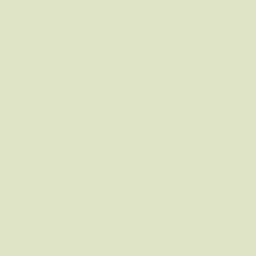

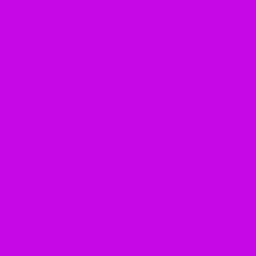

In [ ]:
r1, g1, b1 = random.randint(192, 235), random.randint(192, 235), random.randint(192, 235) #rgb for lower shell color
h, s, v = colorsys.rgb_to_hsv(r1/255, g1/255, b1/255)
r2, g2, b2 = colorsys.hsv_to_rgb(1 - h, random.uniform(0.75, 1), v)
r2, g2, b2 = int(r2*255), int(g2*255), int(b2*255)
color = Image.new("RGB", im1.size, (r1, g1, b1))
color2 = Image.new("RGB", im1.size, (r2, g2, b2))

display(color)
display(color2)

##Mask Line Accessories

In [3]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps, ImageEnhance
import colorsys
import random
import os

In [8]:
linedir = 'Animation/NewEdition/Turtle_raw_line/BASE/'
maskdir = 'Animation/NewEdition/Turtle_raw_line/MASK/'
accdir = 'Animation/NewEdition/Turtle_raw_line/ACC/'
maskaccdir = 'Animation/NewEdition/Turtle_raw_line/MaskACC/'
number_of_acc = 20
output_path = 'Animation/NewEdition/Turtle_raw_line/BaseACC/'

for acc in range(1, number_of_acc + 1):
  if(acc >= 1 and acc <=10):
    accColor = Image.open(accdir + 'Glass/G' + str(acc) + '.jpg')
    accMask = Image.open(maskaccdir + 'MASKGLASS/MaskG' + str(acc) + '.jpg').convert("L")
    dirname = 'MaskG' + str(acc)
  elif(acc >= 11 and acc <=20):
    accColor = Image.open(accdir + 'Helmet/H' + str(acc - 10) + '.jpg')
    accMask = Image.open(maskaccdir + 'MASKHELMET/MaskH' + str(acc - 10) + '.jpg').convert("L")
    dirname = 'MaskH' + str(acc)

  output_subdir = output_path + dirname

  for i in range(1, 6):
    line_filename = 'Turtle_frame_%d.png'%(i)
    line = Image.open(linedir + line_filename)
    line.load()
    turtle = Image.new("RGB", line.size, (255, 255, 255))
    turtle.paste(line, mask=line.split()[3]) # 3 is the alpha channel
    turtle = Image.composite(accColor, turtle, accMask)
    #save image
    if not os.path.exists(output_subdir):
      os.makedirs(output_subdir)
    savename = os.path.join(output_subdir, 'Turtle_frame_%d.jpg'%(i))
    turtle.save(savename, quality=100, subsampling=0)


##Processing

In [ ]:
from PIL import Image, ImageDraw, ImageFilter, ImageOps, ImageEnhance
import colorsys
import random
import os

In [ ]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [ ]:
def ColorizeTurtle(line, bodyMask, shellMask, bodyColor, shellColor, accMask = None, accColor = None):
  turtle = line.copy()
  turtle = Image.composite(bodyColor, turtle, bodyMask) #color the body
  turtle = Image.composite(shellColor, turtle, shellMask) #color the shell
  if(accMask != None and accColor != None):
    turtle = Image.composite(accColor, turtle, accMask) #color the accessories
  return turtle

Old Process

In [ ]:
#loop for coloring turtle through the texture folder
rootdir = 'Animation/NewEdition/Texture'
linedir = 'Animation/NewEdition/Turtle_raw_line/BASE/'
maskdir = 'Animation/NewEdition/Turtle_raw_line/MASK/'
n = 0 #for checking remainder and match the (n+1)th frame of the turtle
shellMask = line = Image.open(maskdir + 'Cover_Mark.png').convert("L") #shellMask is the same of all frame so it can be prepared before the loop
output_path = 'Animation/NewEdition/Turtle_pix2pix/'

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        #print(os.path.join(subdir, file))
        if int(file.replace('.jpg', '')) <= 50: #limit to use 50 picture of each directory
          #prepare require data
          line_filename = 'Turtle_frame_%d.png'%((n%5)+1)
          line = Image.open(linedir + line_filename)
          bodyMask_filename = 'Turtle_frame_%d_mark.png'%((n%5)+1)
          bodyMask = Image.open(maskdir + bodyMask_filename).convert("L")
          r, g, b = random.randint(128, 235), random.randint(128, 235), random.randint(128, 235) #rgb for body color
          bodyColor = Image.new("RGB", line.size, (r, g, b))
          shellTexture = Image.open(os.path.join(subdir, file)).convert("L")
          shellTexture = shellTexture.resize(line.size)
          enhancer  = ImageEnhance.Contrast(shellTexture) #enhance contrast
          factor = 1.5 #increase contrast
          shellTexture = enhancer.enhance(factor) #make texture more contrast
          h = random.uniform(0, 1) #make random base hue
          r1, g1, b1 = colorsys.hsv_to_rgb(h, random.uniform(0.75, 1), random.uniform(0.5, 0.9)) #rgb for lower shell color
          r2, g2, b2 = colorsys.hsv_to_rgb(((h*360 + 180 + random.randint(-36, 36))%360)/360, random.uniform(0.75, 1), random.uniform(0.5, 0.9)) #rgb for upper shell color by using opposite hue of lower shell color plus random jitter
          r2, g2, b2 = int(r2*255), int(g2*255), int(b2*255)
          r1, g1, b1 = int(r1*255), int(g1*255), int(b1*255)
          #r2, g2, b2 = random.randint(20, 235), random.randint(20, 235), random.randint(20, 235) #rgb for upper shell color
          shellColor = ImageOps.colorize(shellTexture, black = (r1, g1, b1), white = (r2, g2, b2)) #color texture
          degree = random.randint(-45, 90) #random rotate degree
          shellColor = shellColor.rotate(degree)

          #make GroundTruth turtle
          GT = ColorizeTurtle(line, bodyMask, shellMask, bodyColor, shellColor)

          #random some data for making Input turtle
          bodyMask2 = bodyMask.filter(ImageFilter.MinFilter(random.randrange(5, 16, 2))) #erode body mask between 5 - 15 and only odd number
          shellMask2 = shellMask.filter(ImageFilter.MaxFilter(5)) #dilate shell mask to delete line on the shell
          shellMask2 = shellMask2.filter(ImageFilter.MinFilter(random.randrange(9, 18, 2))) #erode shell mask between 9 - 17 and only odd number
          shellColor_blur = shellColor.filter(ImageFilter.BLUR)
          #shellColor2 = ImageOps.colorize(shellTexture_blur, black = (r1, g1, b1), white = (r2, g2, b2)) #color blur texture
          shellColor2 = shellColor_blur.convert('P', palette=Image.ADAPTIVE, colors=3) #reduced number of color in the shell texture 
          
          #make Input turtle
          Input = ColorizeTurtle(line, bodyMask2, shellMask2, bodyColor, shellColor2)

          #concatenate GT with Input
          GT_Input = get_concat_h(GT, Input)

          #save image
          if not os.path.exists(output_path):
            os.makedirs(output_path)
          savename = os.path.join(output_path, '%d.jpg'%(n+1))
          GT_Input.save(savename, quality=100, subsampling=0)

          n = n+1

New Process

In [ ]:
#loop for coloring turtle through the texture folder
rootdir = 'Animation/NewEdition/Texture'
linedir = 'Animation/NewEdition/Turtle_raw_line/BASE/'
maskdir = 'Animation/NewEdition/Turtle_raw_line/MASK/'
accdir = 'Animation/NewEdition/Turtle_raw_line/ACC/'
maskaccdir = 'Animation/NewEdition/Turtle_raw_line/MaskACC/'
n = 0 #for checking remainder and match the (n+1)th frame of the turtle
shellMask = line = Image.open(maskdir + 'Cover_Mark.png').convert("L") #shellMask is the same of all frame so it can be prepared before the loop
output_path = 'Animation/NewEdition/Turtle_pix2pix_v2/test/'

#parameter for the number of output pictures
number_of_copies = 11 #how many pictures do you want ?
number_of_texture_dir = 11 #how many kinds of textures do you have ?
number_of_each_texture = 80 #how many textures in each directory ?
n_texture_per_loop = ((number_of_copies//number_of_texture_dir)%number_of_each_texture)*2 #estimate for sharing same amount of each textures to make nearest the number of copies (times 2 because the names of files are only odd number)
n_loop = number_of_copies//((n_texture_per_loop//2)*number_of_texture_dir)
number_of_acc = 20

for acc in range(number_of_acc + 1):
  if(acc == 0):
    accColor = None
    accMask = None
  elif(acc >= 1 and acc <=10):
    accColor = Image.open(accdir + 'Glass/G' + str(acc) + '.jpg')
    accMask = Image.open(maskaccdir + 'MASKGLASS/MaskG' + str(acc) + '.jpg').convert("L")
  elif(acc >= 11 and acc <=20):
    accColor = Image.open(accdir + 'Helmet/H' + str(acc - 10) + '.jpg')
    accMask = Image.open(maskaccdir + 'MASKHELMET/MaskH' + str(acc - 10) + '.jpg').convert("L")
  for i in range(n_loop):
    for subdir, dirs, files in os.walk(rootdir):
      for file in files:
          #print(os.path.join(subdir, file))
          if int(file.replace('.jpg', '')) <= n_texture_per_loop: #limit to use n_texture_per_loop picture of each directory
            #prepare require data
            line_filename = 'Turtle_frame_%d.png'%((n%5)+1)
            line = Image.open(linedir + line_filename)
            bodyMask_filename = 'Turtle_frame_%d_mark.png'%((n%5)+1)
            bodyMask = Image.open(maskdir + bodyMask_filename).convert("L")
            hue = random.uniform(0, 1) #make random base hue
            r, g, b = colorsys.hsv_to_rgb(hue, random.uniform(0.2, 1), random.uniform(0.4, 1)) #rgb for body color
            r, g, b = int(r*255), int(g*255), int(b*255)
            bodyColor = Image.new("RGB", line.size, (r, g, b))
            shellTexture = Image.open(os.path.join(subdir, file)).convert("L")
            shellTexture = shellTexture.resize(line.size)
            enhancer  = ImageEnhance.Contrast(shellTexture) #enhance contrast
            factor = 1.5 #increase contrast
            shellTexture = enhancer.enhance(factor) #make texture more contrast
            h = random.uniform(0, 1) #make random base hue
            r1, g1, b1 = colorsys.hsv_to_rgb(h, random.uniform(0.75, 1), random.uniform(0.4, 1)) #rgb for lower shell color
            r2, g2, b2 = colorsys.hsv_to_rgb(((h*360 + 180 + random.randint(-36, 36))%360)/360, random.uniform(0.75, 1), random.uniform(0.4, 1)) #rgb for upper shell color by using opposite hue of lower shell color plus random jitter
            r2, g2, b2 = int(r2*255), int(g2*255), int(b2*255)
            r1, g1, b1 = int(r1*255), int(g1*255), int(b1*255)
            #r2, g2, b2 = random.randint(20, 235), random.randint(20, 235), random.randint(20, 235) #rgb for upper shell color
            shellColor = ImageOps.colorize(shellTexture, black = (r1, g1, b1), white = (r2, g2, b2)) #color texture
            degree = random.randint(-45, 90) #random rotate degree
            shellColor = shellColor.rotate(degree)

            #make GroundTruth turtle
            GT = ColorizeTurtle(line, bodyMask, shellMask, bodyColor, shellColor, accMask, accColor)

            #random some data for making Input turtle
            bodyMask2 = bodyMask.filter(ImageFilter.MinFilter(random.randrange(5, 16, 2))) #erode body mask between 5 - 15 and only odd number
            shellMask2 = shellMask.filter(ImageFilter.MaxFilter(5)) #dilate shell mask to delete line on the shell
            shellMask2 = shellMask2.filter(ImageFilter.MinFilter(random.randrange(9, 18, 2))) #erode shell mask between 9 - 17 and only odd number
            shellTexture2 = shellTexture.convert('P', palette=Image.ADAPTIVE, colors=2) #reduced number of color in the shell texture 
            shellTexture2 = shellTexture2.convert("L")
            enhancer2  = ImageEnhance.Contrast(shellTexture2) #enhance contrast
            shellTexture2 = enhancer2.enhance(factor) #make texture more contrast
            shellColor2 = ImageOps.colorize(shellTexture2, black = (r1, g1, b1), white = (r2, g2, b2)) #color texture
            shellColor2 = shellColor2.rotate(degree)
            
            #make Input turtle
            Input = ColorizeTurtle(line, bodyMask2, shellMask2, bodyColor, shellColor2, accMask, accColor)

            #concatenate GT with Input
            GT_Input = get_concat_h(GT, Input)

            #save image
            if not os.path.exists(output_path):
              os.makedirs(output_path)
            savename = os.path.join(output_path, '%d.jpg'%(n+1))
            GT_Input.save(savename, quality=100, subsampling=0)

            n = n+1